In [1]:
#Using the .csv files you have downloaded to your machine we will import those files
#Make sure you have your csv files saved in a folder called baseball_data

In [12]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [13]:
# Read CSV Files
at_bats = pd.read_csv("baseball_data/atbats.csv")
games = pd.read_csv("baseball_data/games.csv")
pitches = pd.read_csv("baseball_data/pitches.csv")
player_names = pd.read_csv("baseball_data/player_names.csv")

In [14]:
#Create a smaller dataframe to work with
pitches1 = pitches[["pitch_type", "code"]]
pitches1.head()

,pitch_type,code
0,FF,C
1,FF,S
2,FF,F
3,FF,B
4,CU,B


In [15]:
#Used this code to set index but then decided against it. 
#pitches1.set_index('pitch_type', inplace=True)

ff = pitches1.loc[pitches1["pitch_type"]== "FF"]
ffarray = ff.code.value_counts(normalize=True)

ch = pitches1.loc[pitches1["pitch_type"]== "CH"]
charray = ch.code.value_counts(normalize=True)

cu = pitches1.loc[pitches1["pitch_type"]== "CU"]
cuarray = cu.code.value_counts(normalize=True)

ep = pitches1.loc[pitches1["pitch_type"]== "EP"]
eparray = ep.code.value_counts(normalize=True)

fc = pitches1.loc[pitches1["pitch_type"]== "FC"]
fcarray = fc.code.value_counts(normalize=True)

fo = pitches1.loc[pitches1["pitch_type"]== "FO"]
foarray = fo.code.value_counts(normalize=True)

fs = pitches1.loc[pitches1["pitch_type"]== "FS"]
fsarray = fs.code.value_counts(normalize=True)

ft = pitches1.loc[pitches1["pitch_type"]== "FT"]
ftarray = ft.code.value_counts(normalize=True)

ib = pitches1.loc[pitches1["pitch_type"]== "IN"]
ibarray = ib.code.value_counts(normalize=True)

kc = pitches1.loc[pitches1["pitch_type"]== "KC"]
kcarray = kc.code.value_counts(normalize=True)

kn = pitches1.loc[pitches1["pitch_type"]== "KN"]
knarray = kn.code.value_counts(normalize=True)

po = pitches1.loc[pitches1["pitch_type"]== "PO"]
poarray = po.code.value_counts(normalize=True)

sc = pitches1.loc[pitches1["pitch_type"]== "SC"]
scarray = sc.code.value_counts(normalize=True)

si = pitches1.loc[pitches1["pitch_type"]== "SI"]
siarray = si.code.value_counts(normalize=True)

sl = pitches1.loc[pitches1["pitch_type"]== "SL"]
slarray = sl.code.value_counts(normalize=True)

un = pitches1.loc[pitches1["pitch_type"]== "UN"]
unarray = un.code.value_counts(normalize=True)

In [19]:
#dropped the intentional ball array and the unknown array and pitchout array
pitch_type_and_result = pd.DataFrame({"Four-seam Fastball" : ffarray, "Changeup": charray, "Curveball":cuarray, 
                                      "Eephus":eparray, "Cutter":fcarray, "Pitchout":foarray, "Splitter":fsarray, "Two-seam Fastball":ftarray,
                                      "Knuckle curve":kcarray, "Knuckleball":knarray, "Screwball":scarray, 
                                      "Sinker":siarray, "Slider":slarray})

In [20]:
#pitch_type_and_result
#this shows us the table

In [25]:
#rename the indeces for easier reference
ptar = pitch_type_and_result.rename(index = {"*B":"Ball in dirt", "B":"Ball", "C":"Called Strike","D":"In play, no out",
                             "E":"In play, runs","F":"Foul", "H":"Hit by pitch", "L":"Foul Bunt", "M":"Missed Bunt", 
                             "S":"Swinging Strike", "T":"Foul Tip", "W":"Swinging Strike (Blocked)", "X":"In play, out(s)"})

In [27]:
#transposing the dataframe to run the statistical analysis
pitch_and_result = ptar.T
pitch_and_result

,Ball in dirt,Ball,Called Strike,"In play, no out","In play, runs",Foul,Hit by pitch,Foul Bunt,Missed Bunt,Swinging Strike,Foul Tip,Swinging Strike (Blocked),"In play, out(s)"
Four-seam Fastball,0.005404,0.339221,0.184567,0.039001,0.022075,0.203958,0.002295,0.003137,0.000411,0.078946,0.011181,0.000173,0.109631
Changeup,0.041140,0.338734,0.101444,0.043341,0.023442,0.154507,0.001229,0.002776,0.000657,0.142741,0.007083,0.010455,0.132451
Curveball,0.055213,0.347535,0.191738,0.033166,0.018712,0.124256,0.003001,0.002112,0.000817,0.093808,0.004527,0.028754,0.096361
Eephus,0.034483,0.378079,0.102217,0.038177,0.018473,0.151478,0.011084,0.002463,NaN,0.105911,0.001232,0.025862,0.130542
Cutter,0.018430,0.327496,0.148344,0.042932,0.023478,0.187768,0.002283,0.003100,0.000756,0.107353,0.008616,0.003655,0.125790
Pitchout,0.098765,0.296296,0.053086,0.037037,0.034568,0.162963,0.003704,0.001235,NaN,0.170370,0.003704,0.041975,0.096296
Splitter,0.057221,0.323456,0.085843,0.041578,0.022282,0.159856,0.001378,0.002205,0.000574,0.150070,0.007879,0.024395,0.123263
Two-seam Fastball,0.010307,0.345723,0.182518,0.052487,0.025032,0.177471,0.003401,0.003769,0.000792,0.054984,0.007508,0.000519,0.135489
Knuckle curve,0.057491,0.328866,0.193826,0.035733,0.018717,0.126231,0.002274,0.001536,0.001114,0.100467,0.005376,0.034844,0.093525
Knuckleball,0.017318,0.347069,0.155595,0.040764,0.023002,0.169627,0.002753,0.002131,0.000622,0.100355,0.006927,0.002220,0.131616


In [ ]:
#Now for some ANOVA

In [44]:
pitches.code.value_counts()

B     956648
F     496512
C     480905
X     330876
S     271330
D     117124
*B     65676
E      64166
T      23947
W      23137
L       8471
H       6938
V       6652
I       6588
M       1845
P        619
Q          6
R          2
Z          1
Name: code, dtype: int64

In [ ]:
#Grabbing percentages of the outcome of pitches
pitchtypefrequency_ = pitches.pitch_type.value_counts()
pitchtypefrequency = pitches.pitch_type.value_counts(normalize=True)*100
pitchtypelabel = pitchtypefrequency.index
pitchtypevalue = pitchtypefrequency

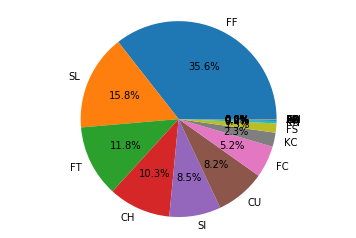

In [68]:
#Pie chart it out
plt.pie(pitchtypefrequency, labels=pitchtypelabel, autopct="%1.1f%%")
plt.axis("equal")
plt.show()

In [69]:
#Grabbing percentages of the outcome of pitches
pitchoutcomefrequency_ = pitches.pitch_type.value_counts()
pitchoutcomefrequency = pitches.code.value_counts(normalize=True)*100
outcomelabel = pitchfrequency.index
outcomevalue = pitchfrequency

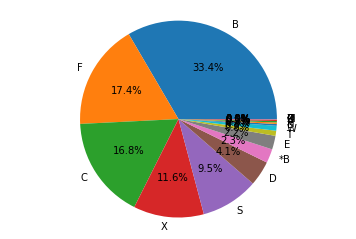

In [70]:
#Pie chart it out
plt.pie(pitchoutcomefrequency, labels=outcomelabel, autopct="%1.1f%%")
plt.axis("equal")
plt.show()

In [62]:
pitches.columns

Index(['ab_id', 'ax', 'ay', 'az', 'b_count', 'b_score', 'break_angle',
       'break_length', 'break_y', 'code', 'end_speed', 'nasty', 'on_1b',
       'on_2b', 'on_3b', 'outs', 'pfx_x', 'pfx_z', 'pitch_num', 'pitch_type',
       'px', 'pz', 's_count', 'spin_dir', 'spin_rate', 'start_speed', 'sz_bot',
       'sz_top', 'type', 'type_confidence', 'vx0', 'vy0', 'vz0', 'x', 'x0',
       'y', 'y0', 'z0', 'zone'],
      dtype='object')

In [30]:
#Merge the two tables
completepitches = pd.merge(pitches, at_bats, on="ab_id")
completepitches.head()

,ab_id,ax,ay,az,b_count,b_score,break_angle,break_length,break_y,code,...,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top
0,2015000001,7.665,34.685,-11.960,0,0,-25.0,3.2,23.7,C,...,572761,Groundout,201500001,1,1,0,L,452657,L,True
1,2015000001,12.043,34.225,-10.085,0,0,-40.7,3.4,23.7,S,...,572761,Groundout,201500001,1,1,0,L,452657,L,True
2,2015000001,14.368,35.276,-11.560,0,0,-43.7,3.7,23.7,F,...,572761,Groundout,201500001,1,1,0,L,452657,L,True
3,2015000001,2.104,28.354,-20.540,0,0,-1.3,5.0,23.8,B,...,572761,Groundout,201500001,1,1,0,L,452657,L,True
4,2015000001,-10.280,21.774,-34.111,1,0,18.4,12.0,23.8,B,...,572761,Groundout,201500001,1,1,0,L,452657,L,True
